In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [3]:
## load the dataset
iris = datasets.load_iris()

In [4]:
iris_data = pd.DataFrame(iris.data)

In [6]:
iris_data.columns = iris.feature_names

In [7]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [9]:
X_scaled = scaler.fit_transform(iris_data)

In [10]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [11]:
## Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [12]:
pca_scaled = pca.fit_transform(X_scaled)

In [13]:
pca_scaled

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

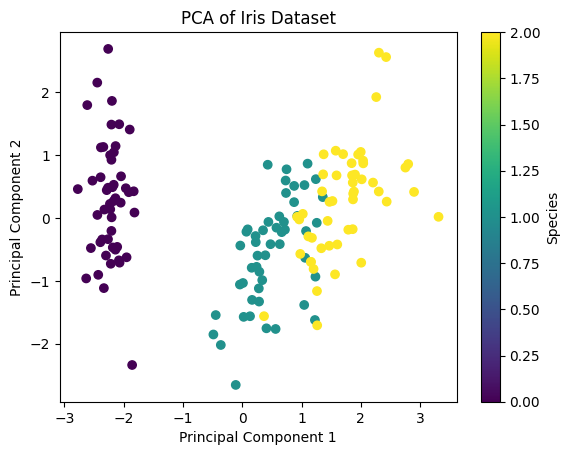

In [14]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=iris.target, cmap='viridis')
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Species')
plt.show()

In [15]:
## algomertive Clustering
import scipy.cluster.hierarchy as sch


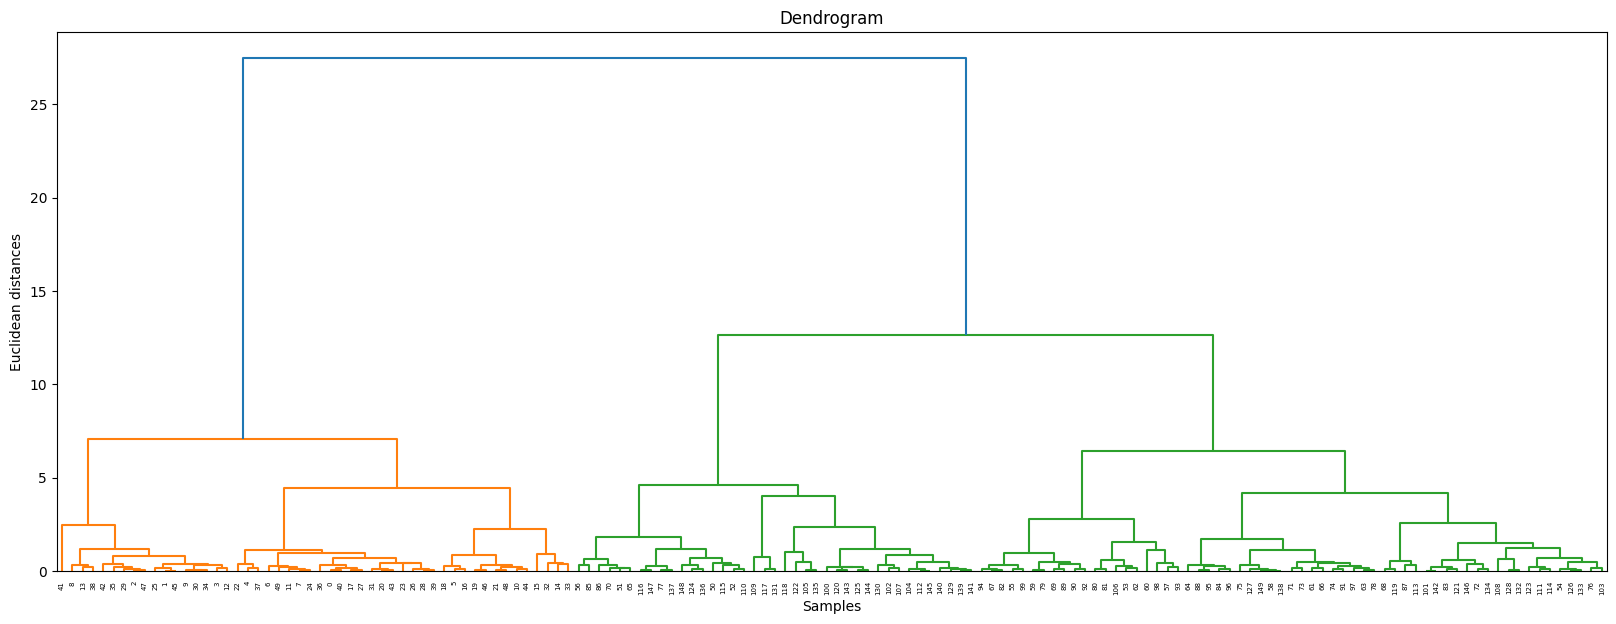

In [16]:
## plot the dendrogram
plt.figure(figsize=(20,7))
plt.title('Dendrogram')

##create the dendrogram
sch.dendrogram(sch.linkage(pca_scaled, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


In [17]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

In [22]:
cluster.fit(pca_scaled)

,n_clusters,2
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


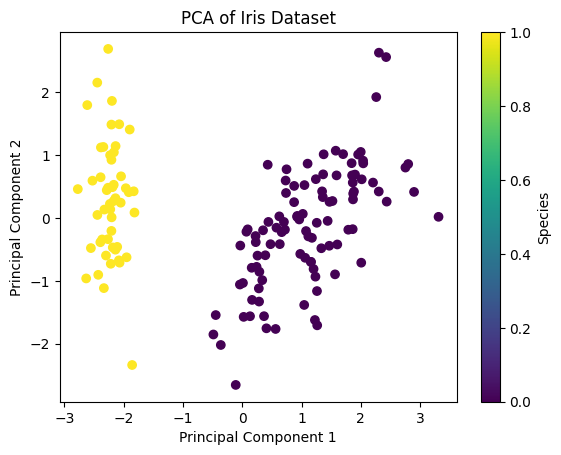

In [24]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=cluster.labels_, cmap='viridis')
plt.xlabel('Principal Component 1') 
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Species')
plt.show()